In [2]:
import pandas as pd
from  datetime import datetime, timedelta
import matplotlib.pyplot as plt
import gc
import numpy as np

In [3]:
# Read csv file
calendar = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/calendar_2.csv")
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,CA,TX,WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,4,4,4
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,4,4,4
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,2,2,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,2,0,2
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,2,2,2
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,2,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,6,6,6
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,5,5,5
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,2,2,0


In [4]:
# Read csv file
pricetypes = {'store_id': 'category',
             'item_id': 'category',
             'wm_yr_wk': 'int16',
             'sell_price': 'float32',
             'sell_diff': 'float32',
             'ratio': 'float32'}

prices_ca = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sell_price_ca.csv", dtype = pricetypes)
prices_tx = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sell_price_tx.csv", dtype = pricetypes)
prices_wi = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sell_price_wi.csv", dtype = pricetypes)

In [5]:
prices_ca.head()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio,train_id
0,CA_1,HOBBIES_1_001,11325,9.58,NaN,1.00,1437
1,CA_1,HOBBIES_1_001,11326,9.58,0.00,1.00,1437
2,CA_1,HOBBIES_1_001,11327,8.26,-1.32,0.86,1437
3,CA_1,HOBBIES_1_001,11328,8.26,0.00,0.86,1437
4,CA_1,HOBBIES_1_001,11329,8.26,0.00,0.86,1437


In [6]:
firstDay = 1183 
lastDay = 1913

# Use x sales days (columns) for training
numCols = [f"d_{day}" for day in range(firstDay, lastDay+1)]

# Define all categorical columns
catCols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']

# Define the correct data types for "sales_train_validation.csv"
dtype = {numCol: "float32" for numCol in numCols} 
dtype.update({catCol: "category" for catCol in catCols if catCol != "id"})

[(k,v)  for k,v in dtype.items()][:10]

[('d_1183', 'float32'),
 ('d_1184', 'float32'),
 ('d_1185', 'float32'),
 ('d_1186', 'float32'),
 ('d_1187', 'float32'),
 ('d_1188', 'float32'),
 ('d_1189', 'float32'),
 ('d_1190', 'float32'),
 ('d_1191', 'float32'),
 ('d_1192', 'float32')]

In [7]:
# Read csv file
ds = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sales_train_validation.csv", 
                 usecols = catCols + numCols, dtype = dtype)

ds.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1183,d_1184,d_1185,d_1186,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1.0,1.0,4.0,1.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,1.0,2.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [8]:
ds.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1183,d_1184,d_1185,d_1186,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,3.0
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
CA_validation = ds[(ds['state_id'] == 'CA')].copy()

In [10]:
CA_validation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1183,d_1184,d_1185,d_1186,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1.0,1.0,4.0,1.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,1.0,2.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,FOODS_3_823,FOODS_3,FOODS,CA_4,CA,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,3.0,0.0
12192,FOODS_3_824_CA_4_validation,FOODS_3_824,FOODS_3,FOODS,CA_4,CA,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
12193,FOODS_3_825_CA_4_validation,FOODS_3_825,FOODS_3,FOODS,CA_4,CA,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,0.0
12194,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,FOODS,CA_4,CA,2.0,0.0,1.0,3.0,...,1.0,2.0,2.0,1.0,4.0,5.0,1.0,7.0,0.0,4.0


In [11]:
# Transform categorical features into integers
trLast = 1913

def create_ds(data,prices):
    for day in range(trLast + 1, trLast+ 56 +1):
        data[f"d_{day}"] = np.nan
        
    data = pd.melt(data,
                 id_vars = catCols,
                 value_vars = [col for col in data.columns if col.startswith("d_")],
                 var_name = "d",
                 value_name = "sales")

# # Merge data with "calendar" and "prices" dataframe
    data = data.merge(calendar, on = "d", copy = False)
    data = data.merge(prices, on = ["store_id", "item_id","wm_yr_wk",], copy = False)
    return data

In [12]:
CA_validation = create_ds(CA_validation,prices_ca)
CA_validation.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,year,event_name_1,event_type_1,CA,TX,WI,sell_price,sell_diff,ratio,train_id
9310557,FOODS_3_825_CA_4_validation,FOODS_3_825,FOODS_3,CA_4,FOODS,CA,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,3.94,-0.04,0.9,1434
9310558,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,CA_4,FOODS,CA,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.28,0.00,1.0,1435
9310559,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,CA_4,FOODS,CA,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.28,0.00,1.0,1435
9310560,FOODS_3_827_CA_4_validation,FOODS_3_827,FOODS_3,CA_4,FOODS,CA,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.00,0.00,1.0,1436
9310561,FOODS_3_827_CA_4_validation,FOODS_3_827,FOODS_3,CA_4,FOODS,CA,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.00,0.00,1.0,1436


In [13]:
CA_va_traindata_1 = CA_validation.copy()
CA_va_traindata_1 = CA_va_traindata_1.drop('event_name_1', axis = 1)
CA_va_traindata_1 = CA_va_traindata_1.drop('event_type_1', axis = 1)

In [14]:
CA_validation

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,year,event_name_1,event_type_1,CA,TX,WI,sell_price,sell_diff,ratio,train_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,HOBBIES,CA,d_1183,0.0,2014-04-25,11412,...,2014,NaN,NaN,0,0,0,8.26,0.00,0.86,1437
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,HOBBIES,CA,d_1183,1.0,2014-04-25,11412,...,2014,NaN,NaN,0,0,0,3.97,0.00,1.00,1438
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,HOBBIES,CA,d_1183,0.0,2014-04-25,11412,...,2014,NaN,NaN,0,0,0,2.97,0.00,1.00,1439
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,HOBBIES,CA,d_1183,1.0,2014-04-25,11412,...,2014,NaN,NaN,0,0,0,4.64,0.00,1.00,1440
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,HOBBIES,CA,d_1183,1.0,2014-04-25,11412,...,2014,NaN,NaN,0,0,0,3.08,0.00,1.00,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310557,FOODS_3_825_CA_4_validation,FOODS_3_825,FOODS_3,CA_4,FOODS,CA,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,3.94,-0.04,0.90,1434
9310558,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,CA_4,FOODS,CA,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.28,0.00,1.00,1435
9310559,FOODS_3_826_CA_4_validation,FOODS_3_826,FOODS_3,CA_4,FOODS,CA,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.28,0.00,1.00,1435
9310560,FOODS_3_827_CA_4_validation,FOODS_3_827,FOODS_3,CA_4,FOODS,CA,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.00,0.00,1.00,1436


In [15]:
from sklearn import preprocessing

CA_item_encoder = preprocessing.LabelEncoder()
CA_item_fit = CA_item_encoder.fit(CA_va_traindata_1['item_id'].unique())
CA_va_traindata_1.iloc[:,1] = CA_item_fit.transform(CA_va_traindata_1.iloc[:,1])

CA_dept_encoder = preprocessing.LabelEncoder()
CA_dept_fit = CA_dept_encoder.fit(CA_va_traindata_1['dept_id'].unique())
CA_va_traindata_1.iloc[:,2] = CA_dept_fit.transform(CA_va_traindata_1.iloc[:,2])

CA_store_encoder = preprocessing.LabelEncoder()
CA_store_fit = CA_store_encoder.fit(CA_va_traindata_1['store_id'].unique())
CA_va_traindata_1.iloc[:,3] = CA_store_fit.transform(CA_va_traindata_1.iloc[:,3])

CA_cat_encoder = preprocessing.LabelEncoder()
CA_cat_fit = CA_cat_encoder.fit(CA_va_traindata_1['cat_id'].unique())
CA_va_traindata_1.iloc[:,4] = CA_cat_fit.transform(CA_va_traindata_1.iloc[:,4])

CA_va_traindata_1

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,CA,TX,WI,sell_price,sell_diff,ratio,train_id
0,HOBBIES_1_001_CA_1_validation,1437,3,0,1,CA,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,8.26,0.00,0.86,1437
1,HOBBIES_1_002_CA_1_validation,1438,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,3.97,0.00,1.00,1438
2,HOBBIES_1_003_CA_1_validation,1439,3,0,1,CA,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,2.97,0.00,1.00,1439
3,HOBBIES_1_004_CA_1_validation,1440,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,4.64,0.00,1.00,1440
4,HOBBIES_1_005_CA_1_validation,1441,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,3.08,0.00,1.00,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310557,FOODS_3_825_CA_4_validation,1434,2,3,0,CA,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,3.94,-0.04,0.90,1434
9310558,FOODS_3_826_CA_4_validation,1435,2,3,0,CA,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.28,0.00,1.00,1435
9310559,FOODS_3_826_CA_4_validation,1435,2,3,0,CA,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,1.28,0.00,1.00,1435
9310560,FOODS_3_827_CA_4_validation,1436,2,3,0,CA,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.00,0.00,1.00,1436


In [16]:
def daylag(data):
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        data[lagSalesCol] = data[["id","sales"]].groupby("id")["sales"].shift(dayLag)
    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            data[f"rmean_{dayLag}_{window}"] = data[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    return data

In [17]:
CA_va_traindata_1 = daylag(CA_va_traindata_1)
CA_va_traindata_1.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
0,HOBBIES_1_001_CA_1_validation,1437,3,0,1,CA,d_1183,0.0,2014-04-25,11412,...,8.26,0.0,0.86,1437,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_validation,1438,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,3.97,0.0,1.00,1438,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_validation,1439,3,0,1,CA,d_1183,0.0,2014-04-25,11412,...,2.97,0.0,1.00,1439,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_validation,1440,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,4.64,0.0,1.00,1440,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_validation,1441,3,0,1,CA,d_1183,1.0,2014-04-25,11412,...,3.08,0.0,1.00,1441,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
CA_va_traindata_1.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
9310557,FOODS_3_825_CA_4_validation,1434,2,3,0,CA,d_1969,NaN,2016-06-19,11621,...,3.94,-0.04,0.9,1434,NaN,NaN,NaN,NaN,NaN,NaN
9310558,FOODS_3_826_CA_4_validation,1435,2,3,0,CA,d_1968,NaN,2016-06-18,11621,...,1.28,0.00,1.0,1435,NaN,NaN,NaN,NaN,NaN,NaN
9310559,FOODS_3_826_CA_4_validation,1435,2,3,0,CA,d_1969,NaN,2016-06-19,11621,...,1.28,0.00,1.0,1435,NaN,NaN,NaN,NaN,NaN,NaN
9310560,FOODS_3_827_CA_4_validation,1436,2,3,0,CA,d_1968,NaN,2016-06-18,11621,...,1.00,0.00,1.0,1436,NaN,NaN,NaN,NaN,NaN,NaN
9310561,FOODS_3_827_CA_4_validation,1436,2,3,0,CA,d_1969,NaN,2016-06-19,11621,...,1.00,0.00,1.0,1436,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
CA_va_traindata_1.columns

Index(['id', 'item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'CA',
       'TX', 'WI', 'sell_price', 'sell_diff', 'ratio', 'train_id', 'lag_7',
       'lag_28', 'rmean_7_7', 'rmean_28_7', 'rmean_7_28', 'rmean_28_28'],
      dtype='object')

In [20]:
# # Remove all rows with NaN value
CA_va_traindata_1.dropna(inplace = True)

# Define columns that need to be removed
unusedCols = ["id", 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'train_id',
              'weekday', 'year','event_name_1', 'event_type_1','TX','WI','sell_price']
trainCols = CA_va_traindata_1.columns[~CA_va_traindata_1.columns.isin(unusedCols)]


In [21]:
CA_X_train = CA_va_traindata_1[trainCols]
CA_y_train = CA_va_traindata_1[["sales"]]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CA_X_train, CA_y_train, test_size=0.2, random_state=6)

In [90]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_r = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_r.fit(X_train,y_train)

[18:53:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:01] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

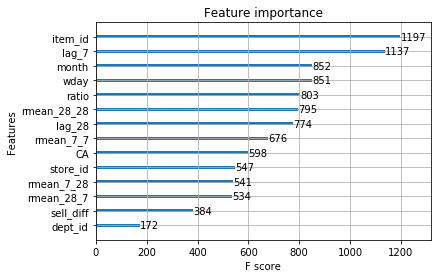

<Figure size 432x288 with 0 Axes>

In [91]:
xgb.plot_importance(xgb_r)
plt.figure(figsize = (6, 4))
plt.show()

In [92]:
predictions = xgb_r.predict(X_test)


In [93]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,predictions))

0.6433994874087954


In [23]:
import lightgbm as lgb
np.random.seed(666)

# Define categorical features
catFeats = ['item_id', 'lag_7', 'month', 'wday', 'ratio', 'rmean_28_28','lag_28', 
            'rmean_7_7', 'CA', 'sell_diff', 'dept_id','store_id', 'rmean_7_28', 'rmean_28_7']

validInds = np.random.choice(CA_X_train.index.values, 2_000_000, replace = False)
trainInds = np.setdiff1d(CA_X_train.index.values, validInds)

trainData = lgb.Dataset(CA_X_train.loc[trainInds], label = CA_y_train.loc[trainInds], 
                        categorical_feature = catFeats,free_raw_data = False)
validData = lgb.Dataset(CA_X_train.loc[validInds], label = CA_y_train.loc[validInds],
                        categorical_feature = catFeats,free_raw_data = False)

In [24]:
# CA_va_traindata, X_train, y_train, validInds,trainInds
import gc
gc.collect()

20

In [25]:
params = {
          "objective" : "poisson",
          "metric" :"rmse",
          "force_row_wise" : True,
          "learning_rate" : 0.075,
          "sub_row" : 0.75,
          "bagging_freq" : 1,
          "lambda_l2" : 0.1,
          "metric": ["rmse"],
          'verbosity': 1,
          'num_iterations' : 1200,
          'num_leaves': 128,
          "min_data_in_leaf": 100,
         }

In [26]:
# Train LightGBM model
m_lgb = lgb.train(params, trainData, valid_sets = validData, verbose_eval = 100) 

C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	valid_0's rmse: 2.25689
[200]	valid_0's rmse: 2.23601
[300]	valid_0's rmse: 2.22473
[400]	valid_0's rmse: 2.2197
[500]	valid_0's rmse: 2.2164
[600]	valid_0's rmse: 2.21519
[700]	valid_0's rmse: 2.21441
[800]	valid_0's rmse: 2.21432
[900]	valid_0's rmse: 2.21368
[1000]	valid_0's rmse: 2.21302
[1100]	valid_0's rmse: 2.21321
[1200]	valid_0's rmse: 2.21349


In [27]:
# Save the model
m_lgb.save_model("model_CA.lgb")

In [28]:
CA_va_traindata_1['date']

550028    2014-06-19
550029    2014-06-20
550035    2014-06-19
550036    2014-06-20
550042    2014-06-19
             ...    
8688546   2016-04-24
8688552   2016-04-23
8688553   2016-04-24
8688559   2016-04-23
8688560   2016-04-24
Name: date, Length: 7956806, dtype: datetime64[ns]

In [29]:
# Last day used for training
trLast = 1913
# Maximum lag day
maxLags = 57

def create_features(ds):          
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        ds[lagSalesCol] = ds[["id","sales"]].groupby("id")["sales"].shift(dayLag)

    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            ds[f"rmean_{dayLag}_{window}"] = ds[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    ds_item_encoder = preprocessing.LabelEncoder()
    ds_item_fit = ds_item_encoder.fit(ds['item_id'].unique())
    ds.iloc[:,1] = ds_item_fit.transform(ds.iloc[:,1])

    ds_dept_encoder = preprocessing.LabelEncoder()
    ds_dept_fit = ds_dept_encoder.fit(ds['dept_id'].unique())
    ds.iloc[:,2] = ds_dept_fit.transform(ds.iloc[:,2])

    ds_store_encoder = preprocessing.LabelEncoder()
    ds_store_fit = ds_store_encoder.fit(ds['store_id'].unique())
    ds.iloc[:,3] = ds_store_fit.transform(ds.iloc[:,3])

    ds_cat_encoder = preprocessing.LabelEncoder()
    ds_cat_fit = ds_cat_encoder.fit(ds['cat_id'].unique())
    ds.iloc[:,4] = ds_cat_fit.transform(ds.iloc[:,4])

In [30]:
fday = datetime(2016,4, 25) 
alphas = [1.028, 1.023, 1.018]
weights = [1/len(alphas)] * len(alphas)
sub = 0.

for icount, (alpha, weight) in enumerate(zip(alphas, weights)):

    te = CA_validation.copy()
    cols = [f"F{i}" for i in range(1,57)]

    for tdelta in range(0, 56):
        day = fday + timedelta(days=tdelta)
        print(tdelta, day)
        tst = te[(te['date'] >= day - timedelta(days=maxLags)) & (te['date'] <= day)].copy()
        create_features(tst)
        tst = tst.loc[tst['date'] == day , trainCols]
        te.loc[te['date'] == day, "sales"] = alpha * m_lgb.predict(tst) # magic multiplier by kyakovlev

    te_sub = te.loc[te['date'] >= fday, ["id", "sales"]].copy()
    te_sub["F"] = [f"F{rank}" for rank in te_sub.groupby("id")["id"].cumcount()+1]
    te_sub = te_sub.set_index(["id", "F" ]).unstack()["sales"][cols].reset_index()
    te_sub.fillna(0., inplace = True)
    te_sub.sort_values("id", inplace = True)
    te_sub.reset_index(drop=True, inplace = True)
    te_sub.to_csv(f"submission_{icount}.csv",index=False)
    if icount == 0 :
        sub = te_sub
        sub[cols] *= weight
    else:
        sub[cols] += te_sub[cols]*weight
    print(icount, alpha, weight)




0 2016-04-25 00:00:00
1 2016-04-26 00:00:00
2 2016-04-27 00:00:00
3 2016-04-28 00:00:00
4 2016-04-29 00:00:00
5 2016-04-30 00:00:00
6 2016-05-01 00:00:00
7 2016-05-02 00:00:00
8 2016-05-03 00:00:00
9 2016-05-04 00:00:00
10 2016-05-05 00:00:00
11 2016-05-06 00:00:00
12 2016-05-07 00:00:00
13 2016-05-08 00:00:00
14 2016-05-09 00:00:00
15 2016-05-10 00:00:00
16 2016-05-11 00:00:00
17 2016-05-12 00:00:00
18 2016-05-13 00:00:00
19 2016-05-14 00:00:00
20 2016-05-15 00:00:00
21 2016-05-16 00:00:00
22 2016-05-17 00:00:00
23 2016-05-18 00:00:00
24 2016-05-19 00:00:00
25 2016-05-20 00:00:00
26 2016-05-21 00:00:00
27 2016-05-22 00:00:00
28 2016-05-23 00:00:00
29 2016-05-24 00:00:00
30 2016-05-25 00:00:00
31 2016-05-26 00:00:00
32 2016-05-27 00:00:00
33 2016-05-28 00:00:00
34 2016-05-29 00:00:00
35 2016-05-30 00:00:00
36 2016-05-31 00:00:00
37 2016-06-01 00:00:00
38 2016-06-02 00:00:00
39 2016-06-03 00:00:00
40 2016-06-04 00:00:00
41 2016-06-05 00:00:00
42 2016-06-06 00:00:00
43 2016-06-07 00:00:0

In [31]:
sub2 = sub.copy()
sub2["id"] = sub2["id"].str.replace("validation$", "evaluation")
sub = pd.concat([sub, sub2], axis=0, sort=False)
sub.head(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,FOODS_1_001_CA_1_validation,0.927956,0.790915,0.794425,0.811036,1.162984,1.084029,1.125935,1.198382,0.973672,...,1.103591,1.211223,1.229905,0.950209,0.877586,0.840688,0.867558,0.863360,1.087978,1.057484
1,FOODS_1_001_CA_2_validation,0.824429,0.598103,0.582692,1.080398,0.758964,0.949260,0.925116,0.972640,1.004881,...,1.199583,1.363717,1.352677,1.116096,1.036269,1.020650,0.966825,1.122059,1.355496,1.081239
2,FOODS_1_001_CA_3_validation,0.968582,0.867226,0.823543,0.799053,0.939079,0.826084,0.893951,1.017386,0.841306,...,1.306324,1.263675,1.066962,0.764463,0.703627,0.665143,0.644050,0.782603,1.054478,0.862459
3,FOODS_1_001_CA_4_validation,0.498148,0.314725,0.305651,0.314836,0.303578,0.266714,0.272724,0.433991,0.347284,...,0.309855,0.259813,0.270160,0.343619,0.356917,0.343747,0.358175,0.301838,0.259813,0.240158
4,FOODS_1_002_CA_1_validation,0.382564,0.450226,0.372874,0.348724,0.365215,0.429549,0.466391,0.389618,0.347600,...,0.406019,0.457918,0.466307,0.361543,0.330874,0.330529,0.330235,0.373037,0.457918,0.419069
5,FOODS_1_002_CA_2_validation,0.537111,0.600783,0.453097,0.414100,0.648796,0.825530,0.937917,0.575600,0.486241,...,0.500516,0.534715,0.524503,0.456949,0.391007,0.396888,0.359462,0.415063,0.534715,0.494116
6,FOODS_1_002_CA_3_validation,0.315646,0.359902,0.415923,0.307021,0.312499,0.509257,0.502330,0.398676,0.300129,...,0.316932,0.326590,0.345691,0.300885,0.285087,0.284312,0.287206,0.293487,0.326590,0.329021
7,FOODS_1_002_CA_4_validation,0.308191,0.292147,0.295489,0.387875,0.293696,0.280552,0.325879,0.301306,0.281939,...,0.299154,0.299283,0.314740,0.305202,0.290663,0.289187,0.289102,0.290132,0.299283,0.295539
8,FOODS_1_003_CA_1_validation,0.720506,0.584620,0.661620,0.592166,0.769984,1.102196,0.697151,0.678693,0.569009,...,0.838704,0.818155,0.805092,0.715221,0.555832,0.572186,0.563825,0.708889,0.818155,0.766431
9,FOODS_1_003_CA_2_validation,1.061954,0.971828,0.946816,0.916638,1.116700,1.563049,1.262950,1.059256,0.758216,...,0.895808,1.206141,1.226936,1.042097,0.948675,0.935171,0.898789,1.016221,1.206141,1.064906


In [105]:
sub.tail(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
12186,HOUSEHOLD_2_514_CA_3_evaluation,0.150352,0.215426,0.136637,0.136558,0.158602,0.216157,0.185867,0.152481,0.186130,...,0.168040,0.192490,0.202263,0.156900,0.147163,0.137739,0.135479,0.159688,0.192490,0.203934
12187,HOUSEHOLD_2_514_CA_4_evaluation,0.120521,0.117014,0.112997,0.138387,0.105804,0.105427,0.100638,0.144979,0.113066,...,0.098351,0.089968,0.099352,0.118039,0.112453,0.105641,0.105188,0.098521,0.089968,0.100285
12188,HOUSEHOLD_2_515_CA_1_evaluation,0.135244,0.145494,0.158891,0.152489,0.166792,0.190428,0.138892,0.125227,0.134446,...,0.139187,0.164501,0.143635,0.114491,0.124501,0.135650,0.128079,0.131696,0.164501,0.139967
12189,HOUSEHOLD_2_515_CA_2_evaluation,0.170084,0.241000,0.286986,0.201188,0.208193,0.409357,0.308822,0.208770,0.189982,...,0.188774,0.238826,0.206318,0.146489,0.168342,0.176906,0.170642,0.173267,0.238826,0.186117
12190,HOUSEHOLD_2_515_CA_3_evaluation,0.138125,0.152759,0.168357,0.155312,0.152856,0.172549,0.140933,0.135114,0.149918,...,0.131233,0.153797,0.137265,0.119073,0.133666,0.147312,0.135738,0.126072,0.153797,0.135120
12191,HOUSEHOLD_2_515_CA_4_evaluation,0.075453,0.085317,0.097319,0.093398,0.126176,0.208412,0.071260,0.068741,0.104038,...,0.078848,0.107626,0.083778,0.065063,0.073884,0.084082,0.079389,0.074897,0.107626,0.075445
12192,HOUSEHOLD_2_516_CA_1_evaluation,0.223012,0.167685,0.166582,0.195179,0.269988,0.290354,0.281462,0.201043,0.168370,...,0.248276,0.272886,0.276664,0.197734,0.167997,0.170195,0.176511,0.233294,0.272886,0.283495
12193,HOUSEHOLD_2_516_CA_2_evaluation,0.230735,0.175848,0.188996,0.174058,0.239504,0.316942,0.228260,0.195190,0.165421,...,0.252277,0.288270,0.304755,0.221234,0.186318,0.184243,0.186783,0.240178,0.288270,0.294512
12194,HOUSEHOLD_2_516_CA_3_evaluation,0.154953,0.141690,0.146477,0.167985,0.193343,0.219034,0.168339,0.149501,0.137548,...,0.183610,0.211049,0.191350,0.152804,0.142800,0.150673,0.168195,0.182604,0.211049,0.194700
12195,HOUSEHOLD_2_516_CA_4_evaluation,0.063540,0.064735,0.064602,0.067477,0.100518,0.079754,0.089788,0.062539,0.064061,...,0.072255,0.075758,0.075621,0.061690,0.063527,0.064651,0.066937,0.069272,0.075758,0.076328


In [106]:
sub.id.nunique(), sub["id"].str.contains("validation$").sum()

(24392, 12196)

In [107]:
sub.shape

(24392, 57)

In [108]:
sub22 = pd.read_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sample_submission.csv')

In [109]:
sub22.shape
# 60980/2 = 30490

(60980, 29)

In [119]:
sub_ca_va = sub22.iloc[:12196,:]
sub_ca_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12192,FOODS_3_824_CA_4_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12193,FOODS_3_825_CA_4_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12194,FOODS_3_826_CA_4_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
sub_ca_va = sub_ca_va.merge(sub, on = ["id"], copy = False)

In [121]:
sub_ca_va.drop(sub_ca_va.columns[1:29], axis = 1, inplace = True)

In [122]:
sub_ca_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_CA_1_validation,0.890045,0.634857,0.622614,0.740800,0.715163,0.829617,0.779096,0.690825,0.617387,...,0.659690,0.732451,0.672953,0.650558,0.612025,0.595340,0.590483,0.650968,0.675881,0.619365
1,HOBBIES_1_002_CA_1_validation,0.192919,0.184693,0.230226,0.177805,0.205588,0.269538,0.330978,0.281104,0.277702,...,0.315774,0.396283,0.404476,0.263273,0.281151,0.264529,0.264733,0.301010,0.396283,0.399870
2,HOBBIES_1_003_CA_1_validation,0.517200,0.456108,0.474681,0.494788,0.597547,0.744143,0.462783,0.237959,0.202351,...,0.260516,0.347798,0.333343,0.209390,0.183462,0.186706,0.186476,0.234447,0.347798,0.303982
3,HOBBIES_1_004_CA_1_validation,2.188758,1.711435,1.199486,1.236011,1.919947,2.757282,2.154798,1.912386,1.592729,...,2.652041,2.969426,3.173727,2.396124,1.998232,1.965467,1.993476,2.412194,3.235327,2.908138
4,HOBBIES_1_005_CA_1_validation,1.280450,1.212711,1.207877,1.251770,1.420164,1.724084,1.662927,1.461888,1.309150,...,1.487541,1.738585,1.734794,1.366318,1.269993,1.276904,1.295598,1.401174,1.738585,1.648702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,0.959821,0.905591,0.782045,0.788341,1.114827,1.139534,0.840555,0.908981,0.939676,...,1.086316,0.865454,1.024311,1.233083,1.120917,1.088197,1.097100,1.075574,0.982570,0.980964
12192,FOODS_3_824_CA_4_validation,0.620830,0.147083,0.538218,0.141831,0.147700,0.152035,0.435767,0.118659,0.322871,...,0.121244,0.129767,0.132445,0.124172,0.114280,0.109072,0.111741,0.113978,0.129767,0.127130
12193,FOODS_3_825_CA_4_validation,0.742403,0.608500,0.711018,0.710899,0.795407,0.831182,0.803380,0.871291,0.684357,...,0.537204,0.527014,0.555836,0.530906,0.477510,0.472258,0.463672,0.497568,0.527014,0.490737
12194,FOODS_3_826_CA_4_validation,2.219373,1.891102,1.831902,2.115628,2.109939,2.044705,2.416515,2.685553,2.240910,...,2.262087,2.179569,2.303579,2.191753,1.879394,1.900974,1.853420,2.129285,2.041672,2.338694


In [123]:
sub_ca_va.shape

(12196, 57)

In [124]:
sub_ca_va.drop(sub_ca_va.columns[29:], axis = 1, inplace = True)

In [125]:
sub_ca_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F19_y,F20_y,F21_y,F22_y,F23_y,F24_y,F25_y,F26_y,F27_y,F28_y
0,HOBBIES_1_001_CA_1_validation,0.890045,0.634857,0.622614,0.740800,0.715163,0.829617,0.779096,0.690825,0.617387,...,0.720789,1.027686,0.660219,0.674852,0.727566,0.706921,0.639552,0.775358,0.858238,0.872443
1,HOBBIES_1_002_CA_1_validation,0.192919,0.184693,0.230226,0.177805,0.205588,0.269538,0.330978,0.281104,0.277702,...,0.270349,0.372538,0.377661,0.263591,0.260689,0.281401,0.238971,0.270349,0.372538,0.377661
2,HOBBIES_1_003_CA_1_validation,0.517200,0.456108,0.474681,0.494788,0.597547,0.744143,0.462783,0.237959,0.202351,...,0.362708,0.527804,0.526673,0.357146,0.301924,0.309479,0.262240,0.398790,0.542460,0.505418
3,HOBBIES_1_004_CA_1_validation,2.188758,1.711435,1.199486,1.236011,1.919947,2.757282,2.154798,1.912386,1.592729,...,2.278397,2.595849,3.128298,2.504452,1.945289,1.597156,1.599832,2.259115,3.019378,2.760345
4,HOBBIES_1_005_CA_1_validation,1.280450,1.212711,1.207877,1.251770,1.420164,1.724084,1.662927,1.461888,1.309150,...,1.381748,1.716713,1.707635,1.349997,1.223507,1.220345,1.244969,1.381748,1.762857,1.767935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,0.959821,0.905591,0.782045,0.788341,1.114827,1.139534,0.840555,0.908981,0.939676,...,1.211442,1.287289,1.394748,1.315387,1.109386,1.365454,1.370661,1.248298,1.300721,1.137172
12192,FOODS_3_824_CA_4_validation,0.620830,0.147083,0.538218,0.141831,0.147700,0.152035,0.435767,0.118659,0.322871,...,0.105775,0.375700,0.379969,0.318987,0.107688,0.305274,0.106687,0.105775,0.116656,0.379969
12193,FOODS_3_825_CA_4_validation,0.742403,0.608500,0.711018,0.710899,0.795407,0.831182,0.803380,0.871291,0.684357,...,0.482493,0.769634,0.567472,0.709441,0.623235,0.715710,0.712609,0.676201,0.972069,0.790939
12194,FOODS_3_826_CA_4_validation,2.219373,1.891102,1.831902,2.115628,2.109939,2.044705,2.416515,2.685553,2.240910,...,1.996694,2.182221,2.321551,2.130668,1.978576,1.967427,1.847094,2.316389,1.986079,2.347308


In [126]:
sub_ca_va.rename(columns = dict(zip(sub_ca_va.columns[1:], sub22.columns[1:])), inplace = True)

In [127]:
sub_ca_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.890045,0.634857,0.622614,0.740800,0.715163,0.829617,0.779096,0.690825,0.617387,...,0.720789,1.027686,0.660219,0.674852,0.727566,0.706921,0.639552,0.775358,0.858238,0.872443
1,HOBBIES_1_002_CA_1_validation,0.192919,0.184693,0.230226,0.177805,0.205588,0.269538,0.330978,0.281104,0.277702,...,0.270349,0.372538,0.377661,0.263591,0.260689,0.281401,0.238971,0.270349,0.372538,0.377661
2,HOBBIES_1_003_CA_1_validation,0.517200,0.456108,0.474681,0.494788,0.597547,0.744143,0.462783,0.237959,0.202351,...,0.362708,0.527804,0.526673,0.357146,0.301924,0.309479,0.262240,0.398790,0.542460,0.505418
3,HOBBIES_1_004_CA_1_validation,2.188758,1.711435,1.199486,1.236011,1.919947,2.757282,2.154798,1.912386,1.592729,...,2.278397,2.595849,3.128298,2.504452,1.945289,1.597156,1.599832,2.259115,3.019378,2.760345
4,HOBBIES_1_005_CA_1_validation,1.280450,1.212711,1.207877,1.251770,1.420164,1.724084,1.662927,1.461888,1.309150,...,1.381748,1.716713,1.707635,1.349997,1.223507,1.220345,1.244969,1.381748,1.762857,1.767935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_validation,0.959821,0.905591,0.782045,0.788341,1.114827,1.139534,0.840555,0.908981,0.939676,...,1.211442,1.287289,1.394748,1.315387,1.109386,1.365454,1.370661,1.248298,1.300721,1.137172
12192,FOODS_3_824_CA_4_validation,0.620830,0.147083,0.538218,0.141831,0.147700,0.152035,0.435767,0.118659,0.322871,...,0.105775,0.375700,0.379969,0.318987,0.107688,0.305274,0.106687,0.105775,0.116656,0.379969
12193,FOODS_3_825_CA_4_validation,0.742403,0.608500,0.711018,0.710899,0.795407,0.831182,0.803380,0.871291,0.684357,...,0.482493,0.769634,0.567472,0.709441,0.623235,0.715710,0.712609,0.676201,0.972069,0.790939
12194,FOODS_3_826_CA_4_validation,2.219373,1.891102,1.831902,2.115628,2.109939,2.044705,2.416515,2.685553,2.240910,...,1.996694,2.182221,2.321551,2.130668,1.978576,1.967427,1.847094,2.316389,1.986079,2.347308


In [128]:
sub22.columns

Index(['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28'],
      dtype='object')

In [129]:
sub_ca_va.columns

Index(['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28'],
      dtype='object')

In [130]:
sub_ca_va.to_csv("submission_ca_va.csv",index=False)

In [148]:
sub_ca_ev = sub22.iloc[30490:42686,:]
sub_ca_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
30490,HOBBIES_1_001_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30491,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30492,HOBBIES_1_003_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30493,HOBBIES_1_004_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30494,HOBBIES_1_005_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42681,FOODS_3_823_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42682,FOODS_3_824_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42683,FOODS_3_825_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42684,FOODS_3_826_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
sub_ca_ev.shape

(12196, 29)

In [150]:
sub_ca_ev = sub_ca_ev.merge(sub, on = ["id"], copy = False)
sub_ca_ev

,id,F1_x,F2_x,F3_x,F4_x,F5_x,F6_x,F7_x,F8_x,F9_x,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.659690,0.732451,0.672953,0.650558,0.612025,0.595340,0.590483,0.650968,0.675881,0.619365
1,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.315774,0.396283,0.404476,0.263273,0.281151,0.264529,0.264733,0.301010,0.396283,0.399870
2,HOBBIES_1_003_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.260516,0.347798,0.333343,0.209390,0.183462,0.186706,0.186476,0.234447,0.347798,0.303982
3,HOBBIES_1_004_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,2.652041,2.969426,3.173727,2.396124,1.998232,1.965467,1.993476,2.412194,3.235327,2.908138
4,HOBBIES_1_005_CA_1_evaluation,0,0,0,0,0,0,0,0,0,...,1.487541,1.738585,1.734794,1.366318,1.269993,1.276904,1.295598,1.401174,1.738585,1.648702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,1.086316,0.865454,1.024311,1.233083,1.120917,1.088197,1.097100,1.075574,0.982570,0.980964
12192,FOODS_3_824_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0.121244,0.129767,0.132445,0.124172,0.114280,0.109072,0.111741,0.113978,0.129767,0.127130
12193,FOODS_3_825_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,0.537204,0.527014,0.555836,0.530906,0.477510,0.472258,0.463672,0.497568,0.527014,0.490737
12194,FOODS_3_826_CA_4_evaluation,0,0,0,0,0,0,0,0,0,...,2.262087,2.179569,2.303579,2.191753,1.879394,1.900974,1.853420,2.129285,2.041672,2.338694


In [151]:
sub_ca_ev.drop(sub_ca_ev.columns[1:29], axis = 1, inplace = True)


In [152]:
sub_ca_ev

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_CA_1_evaluation,0.890045,0.634857,0.622614,0.740800,0.715163,0.829617,0.779096,0.690825,0.617387,...,0.659690,0.732451,0.672953,0.650558,0.612025,0.595340,0.590483,0.650968,0.675881,0.619365
1,HOBBIES_1_002_CA_1_evaluation,0.192919,0.184693,0.230226,0.177805,0.205588,0.269538,0.330978,0.281104,0.277702,...,0.315774,0.396283,0.404476,0.263273,0.281151,0.264529,0.264733,0.301010,0.396283,0.399870
2,HOBBIES_1_003_CA_1_evaluation,0.517200,0.456108,0.474681,0.494788,0.597547,0.744143,0.462783,0.237959,0.202351,...,0.260516,0.347798,0.333343,0.209390,0.183462,0.186706,0.186476,0.234447,0.347798,0.303982
3,HOBBIES_1_004_CA_1_evaluation,2.188758,1.711435,1.199486,1.236011,1.919947,2.757282,2.154798,1.912386,1.592729,...,2.652041,2.969426,3.173727,2.396124,1.998232,1.965467,1.993476,2.412194,3.235327,2.908138
4,HOBBIES_1_005_CA_1_evaluation,1.280450,1.212711,1.207877,1.251770,1.420164,1.724084,1.662927,1.461888,1.309150,...,1.487541,1.738585,1.734794,1.366318,1.269993,1.276904,1.295598,1.401174,1.738585,1.648702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_evaluation,0.959821,0.905591,0.782045,0.788341,1.114827,1.139534,0.840555,0.908981,0.939676,...,1.086316,0.865454,1.024311,1.233083,1.120917,1.088197,1.097100,1.075574,0.982570,0.980964
12192,FOODS_3_824_CA_4_evaluation,0.620830,0.147083,0.538218,0.141831,0.147700,0.152035,0.435767,0.118659,0.322871,...,0.121244,0.129767,0.132445,0.124172,0.114280,0.109072,0.111741,0.113978,0.129767,0.127130
12193,FOODS_3_825_CA_4_evaluation,0.742403,0.608500,0.711018,0.710899,0.795407,0.831182,0.803380,0.871291,0.684357,...,0.537204,0.527014,0.555836,0.530906,0.477510,0.472258,0.463672,0.497568,0.527014,0.490737
12194,FOODS_3_826_CA_4_evaluation,2.219373,1.891102,1.831902,2.115628,2.109939,2.044705,2.416515,2.685553,2.240910,...,2.262087,2.179569,2.303579,2.191753,1.879394,1.900974,1.853420,2.129285,2.041672,2.338694


In [153]:
sub_ca_ev.drop(sub_ca_ev.columns[1:29], axis = 1, inplace = True)
sub_ca_ev

,id,F29,F30,F31,F32,F33,F34,F35,F36,F37,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_CA_1_evaluation,0.772083,0.712418,0.637684,0.608595,0.654823,0.708152,0.700817,0.662020,0.623775,...,0.659690,0.732451,0.672953,0.650558,0.612025,0.595340,0.590483,0.650968,0.675881,0.619365
1,HOBBIES_1_002_CA_1_evaluation,0.263591,0.260689,0.251918,0.238971,0.270349,0.372538,0.377661,0.280770,0.260689,...,0.315774,0.396283,0.404476,0.263273,0.281151,0.264529,0.264733,0.301010,0.396283,0.399870
2,HOBBIES_1_003_CA_1_evaluation,0.217225,0.184452,0.189185,0.190170,0.248342,0.368391,0.352767,0.233075,0.184452,...,0.260516,0.347798,0.333343,0.209390,0.183462,0.186706,0.186476,0.234447,0.347798,0.303982
3,HOBBIES_1_004_CA_1_evaluation,2.126914,1.664780,1.831265,1.846783,2.311134,2.877114,3.175458,2.482174,1.837438,...,2.652041,2.969426,3.173727,2.396124,1.998232,1.965467,1.993476,2.412194,3.235327,2.908138
4,HOBBIES_1_005_CA_1_evaluation,1.357342,1.223507,1.220345,1.224117,1.358519,1.716713,1.707635,1.408529,1.223507,...,1.487541,1.738585,1.734794,1.366318,1.269993,1.276904,1.295598,1.401174,1.738585,1.648702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_evaluation,1.184490,1.105648,1.095331,1.099508,0.997262,0.815014,1.119249,1.176664,1.117206,...,1.086316,0.865454,1.024311,1.233083,1.120917,1.088197,1.097100,1.075574,0.982570,0.980964
12192,FOODS_3_824_CA_4_evaluation,0.112283,0.107688,0.103623,0.106687,0.105775,0.116656,0.117981,0.131938,0.107688,...,0.121244,0.129767,0.132445,0.124172,0.114280,0.109072,0.111741,0.113978,0.129767,0.127130
12193,FOODS_3_825_CA_4_evaluation,0.713663,0.463939,0.452195,0.448128,0.482493,0.539567,0.567472,0.525262,0.463939,...,0.537204,0.527014,0.555836,0.530906,0.477510,0.472258,0.463672,0.497568,0.527014,0.490737
12194,FOODS_3_826_CA_4_evaluation,2.186619,1.980236,1.865097,1.975084,2.063835,2.195929,2.297649,2.099155,2.026342,...,2.262087,2.179569,2.303579,2.191753,1.879394,1.900974,1.853420,2.129285,2.041672,2.338694


In [154]:
sub_ca_ev.rename(columns = dict(zip(sub_ca_ev.columns[1:], sub22.columns[1:])), inplace = True)
sub_ca_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0.772083,0.712418,0.637684,0.608595,0.654823,0.708152,0.700817,0.662020,0.623775,...,0.659690,0.732451,0.672953,0.650558,0.612025,0.595340,0.590483,0.650968,0.675881,0.619365
1,HOBBIES_1_002_CA_1_evaluation,0.263591,0.260689,0.251918,0.238971,0.270349,0.372538,0.377661,0.280770,0.260689,...,0.315774,0.396283,0.404476,0.263273,0.281151,0.264529,0.264733,0.301010,0.396283,0.399870
2,HOBBIES_1_003_CA_1_evaluation,0.217225,0.184452,0.189185,0.190170,0.248342,0.368391,0.352767,0.233075,0.184452,...,0.260516,0.347798,0.333343,0.209390,0.183462,0.186706,0.186476,0.234447,0.347798,0.303982
3,HOBBIES_1_004_CA_1_evaluation,2.126914,1.664780,1.831265,1.846783,2.311134,2.877114,3.175458,2.482174,1.837438,...,2.652041,2.969426,3.173727,2.396124,1.998232,1.965467,1.993476,2.412194,3.235327,2.908138
4,HOBBIES_1_005_CA_1_evaluation,1.357342,1.223507,1.220345,1.224117,1.358519,1.716713,1.707635,1.408529,1.223507,...,1.487541,1.738585,1.734794,1.366318,1.269993,1.276904,1.295598,1.401174,1.738585,1.648702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,FOODS_3_823_CA_4_evaluation,1.184490,1.105648,1.095331,1.099508,0.997262,0.815014,1.119249,1.176664,1.117206,...,1.086316,0.865454,1.024311,1.233083,1.120917,1.088197,1.097100,1.075574,0.982570,0.980964
12192,FOODS_3_824_CA_4_evaluation,0.112283,0.107688,0.103623,0.106687,0.105775,0.116656,0.117981,0.131938,0.107688,...,0.121244,0.129767,0.132445,0.124172,0.114280,0.109072,0.111741,0.113978,0.129767,0.127130
12193,FOODS_3_825_CA_4_evaluation,0.713663,0.463939,0.452195,0.448128,0.482493,0.539567,0.567472,0.525262,0.463939,...,0.537204,0.527014,0.555836,0.530906,0.477510,0.472258,0.463672,0.497568,0.527014,0.490737
12194,FOODS_3_826_CA_4_evaluation,2.186619,1.980236,1.865097,1.975084,2.063835,2.195929,2.297649,2.099155,2.026342,...,2.262087,2.179569,2.303579,2.191753,1.879394,1.900974,1.853420,2.129285,2.041672,2.338694


In [155]:
sub_ca_ev.to_csv("submission_ca_ev.csv",index=False)